In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Area dataset analysis

In [2]:
df_area = pd.read_csv('raw_data/area_raw_data.csv')

In [3]:
df_area.Área.value_counts()

Operações     1713
Comercial     1590
Logística      919
Financeiro      92
Pessoas         80
Name: Área, dtype: int64

In [4]:
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CPF     4394 non-null   object
 1   Área    4394 non-null   object
dtypes: object(2)
memory usage: 68.8+ KB


### Performance dataset analysis

In [99]:
df_per = pd.read_csv('raw_data/performance_raw_data.csv')

In [100]:
df_per.head()

,CPF,Performance 1º/2019,Performance 2º/2018,Performance 1º/2018,Performance 2º 2017
0,678.042.935-18,3.0,2.0,2.0,3.0
1,089.324.175-12,2.0,2.0,2.0,2.0
2,587.416.093-11,2.0,2.0,2.0,2.0
3,375.410.982-13,3.0,2.0,3.0,3.0
4,652.134.809-42,1.0,2.0,1.0,3.0


In [94]:
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPF                  2382 non-null   object 
 1   Performance 1º/2019  1547 non-null   float64
 2   Performance 2º/2018  1577 non-null   float64
 3   Performance 1º/2018  988 non-null    float64
 4   Performance 2º 2017  353 non-null    float64
dtypes: float64(4), object(1)
memory usage: 93.2+ KB


In [97]:
df_per.describe()

,Performance 1º/2019,Performance 2º/2018,Performance 1º/2018,Performance 2º 2017
count,1547.000000,1577.000000,988.000000,353.000000
mean,1.997414,1.984781,1.998988,1.662890
std,0.490524,0.560793,0.823292,0.830669
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,3.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000


In [104]:
#Assuming to use average performance as performance metric
df_per['AveragePerformance'] = df_per.mean(axis=1)
df_per['ModePerformance'] = df_per.mode(axis=1,numeric_only=True)[0]
df_performance = df_per.drop(['Performance 1º/2019','Performance 2º/2018','Performance 1º/2018','Performance 2º 2017'],axis=1)
print(df_performance.head())
df_performance.to_csv('processed_data/performance_data.csv',index=False)

              CPF  AveragePerformance  ModePerformance
0  678.042.935-18                2.50              2.0
1  089.324.175-12                2.00              2.0
2  587.416.093-11                2.00              2.0
3  375.410.982-13                2.75              3.0
4  652.134.809-42                1.75              1.0


### Create df with all data

In [105]:
df_features = pd.read_csv('processed_data/psyctest_data.csv')
df_performance = pd.read_csv('processed_data/performance_data.csv')

In [106]:
df = df_features.merge(df_area.merge(df_performance,on="CPF"),on='CPF')
df.head()
df.to_csv("processed_data/all_data.csv",index=False) #all_data before cleaning with CPF
df = df.drop(["CPF"],axis=1)

### Vizualize the data

<AxesSubplot:xlabel='Área', ylabel='AveragePerformance'>

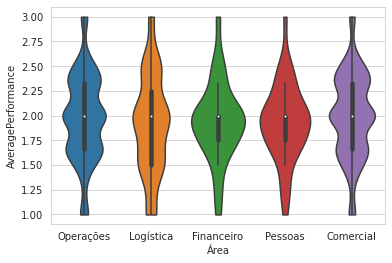

In [12]:
sns.set_style("whitegrid")
sns.violinplot(data=df, x = "Área", y = "AveragePerformance",cut=0)
#All the areas have similar performance distribution

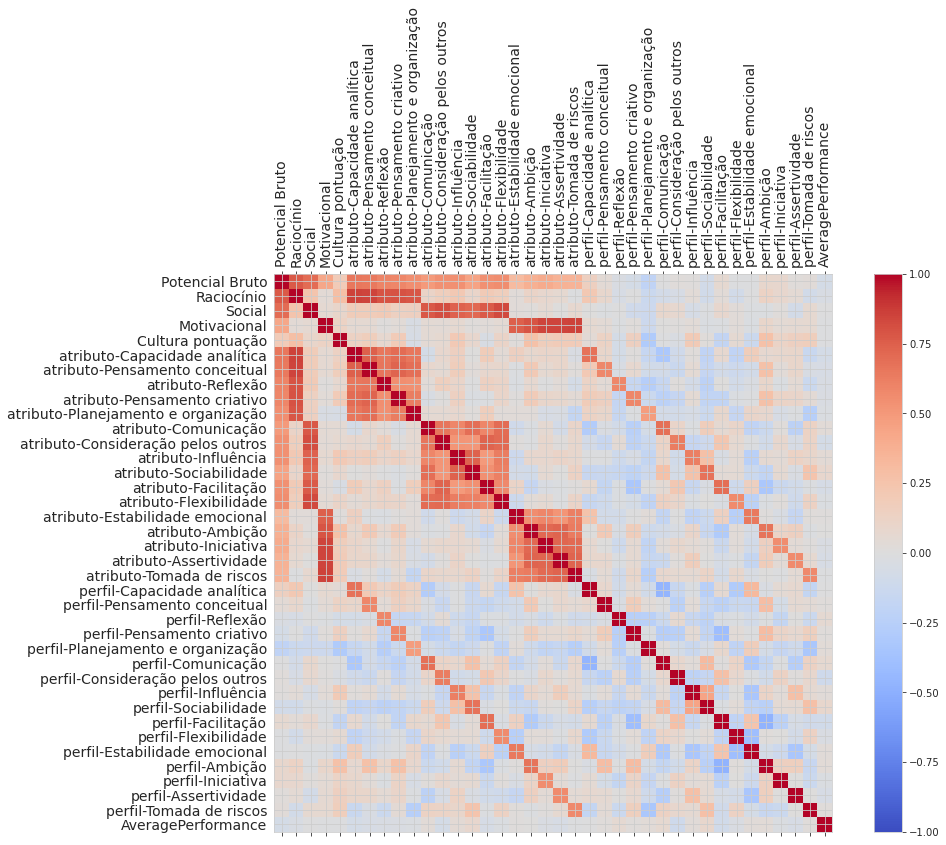

In [13]:
from locale import normalize


f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number,cmap=plt.cm.coolwarm,vmin = -1,vmax=1)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

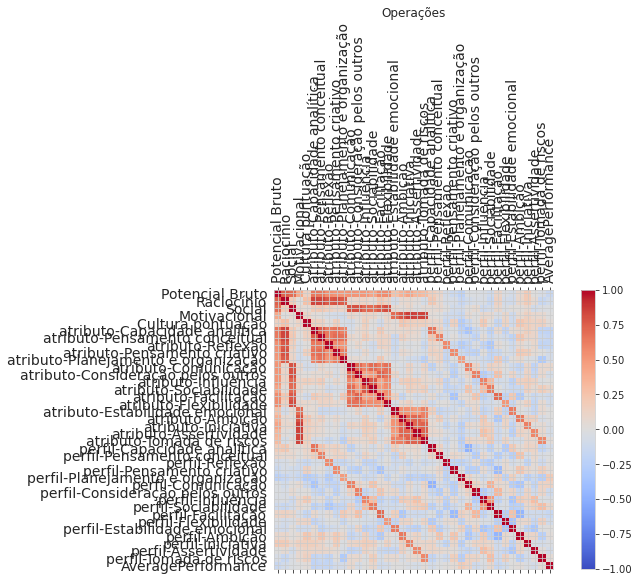

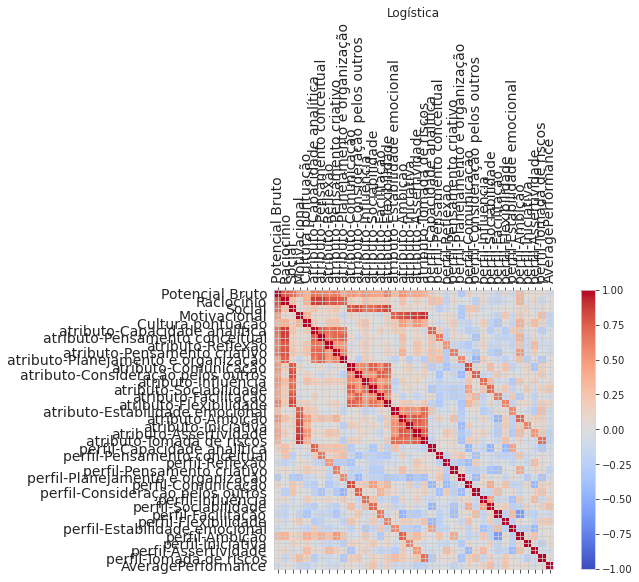

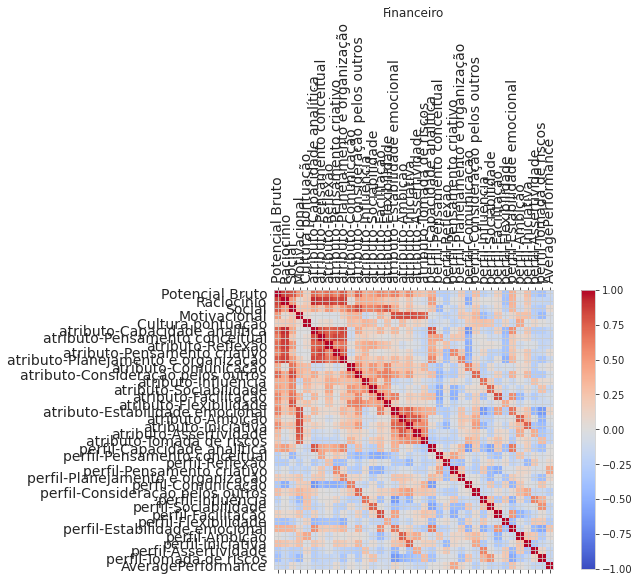

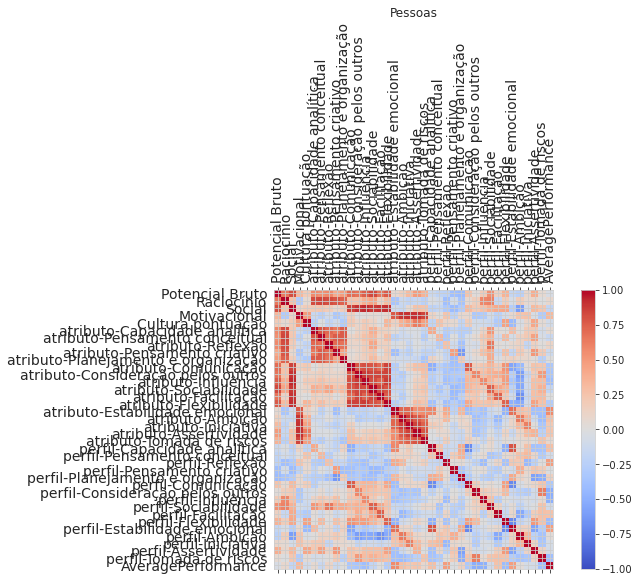

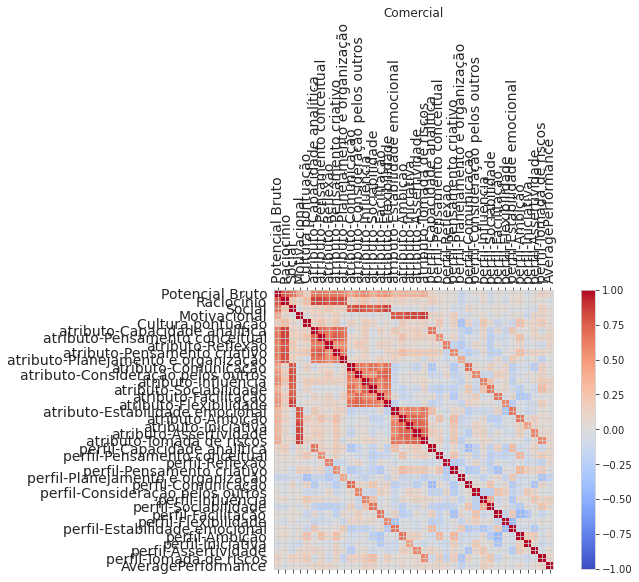

In [14]:
for area in df["Área"].unique():
    f = plt.figure(figsize=(10, 5))
    plt.matshow(df[df.Área == area].corr(),fignum=f.number,cmap=plt.cm.coolwarm,vmin = -1,vmax=1)
    plt.xticks(range(df[df.Área == area].select_dtypes(['number']).shape[1]), df[df.Área == area].select_dtypes(['number']).columns, fontsize=14, rotation=90)
    plt.yticks(range(df[df.Área == area].select_dtypes(['number']).shape[1]), df[df.Área == area].select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title(area)
plt.show()

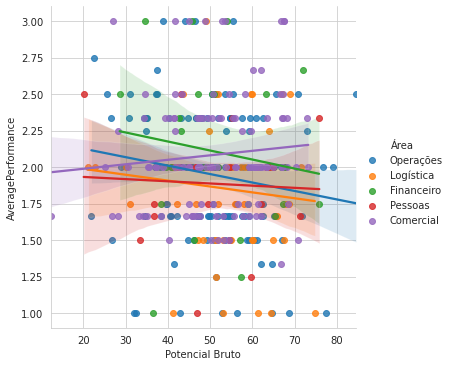

In [15]:
sns.lmplot(data=df,x='Potencial Bruto', y='AveragePerformance',hue='Área')

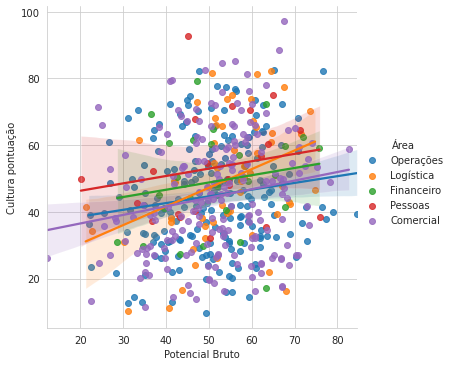

In [108]:
sns.lmplot(data=df,x='Potencial Bruto', y='Cultura pontuação',hue='Área')

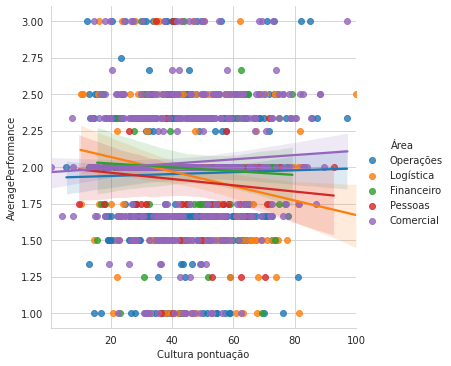

In [107]:
sns.lmplot(data=df,x='Cultura pontuação', y='AveragePerformance',hue='Área')

### Prepare all data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2268
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Potencial Bruto                      506 non-null    float64
 1   Raciocínio                           1703 non-null   float64
 2   Social                               533 non-null    float64
 3   Motivacional                         524 non-null    float64
 4   Cultura pontuação                    1753 non-null   float64
 5   atributo-Capacidade analítica        500 non-null    float64
 6   atributo-Pensamento conceitual       500 non-null    float64
 7   atributo-Reflexão                    500 non-null    float64
 8   atributo-Pensamento criativo         500 non-null    float64
 9   atributo-Planejamento e organização  500 non-null    float64
 10  atributo-Comunicação                 500 non-null    float64
 11  atributo-Consideração pelos ou

In [17]:
df.describe()

,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,...,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,AveragePerformance
count,506.000000,1703.000000,533.000000,524.000000,1753.000000,500.000000,500.00000,500.000000,500.000000,500.000000,...,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,1526.000000
mean,51.465850,50.564862,50.088462,53.712977,44.461854,56.744200,50.05448,44.371900,48.625060,53.408640,...,53.181107,55.162849,49.080363,47.035027,53.817586,51.265191,51.395554,41.923811,39.869673,1.974498
std,12.138774,19.312678,18.414352,18.541536,16.837425,22.674387,21.24215,20.752553,21.121398,20.038816,...,20.191493,21.980686,20.456823,15.655197,21.329312,19.530756,15.610840,15.780159,15.311130,0.443040
min,12.250000,6.810000,5.670000,5.550000,0.350000,5.760000,3.90000,0.770000,0.000000,9.540000,...,6.140000,6.140000,4.840000,7.440000,6.140000,7.440000,8.740000,6.140000,4.840000,1.000000
25%,43.337500,36.415000,37.650000,41.170000,32.020000,40.507500,33.67250,28.642500,33.407500,37.375000,...,37.410000,37.410000,32.860000,37.410000,37.410000,37.410000,41.950000,32.860000,28.320000,1.666667
50%,51.890000,52.230000,50.820000,51.560000,43.030000,59.365000,51.09500,44.940000,48.310000,56.080000,...,55.590000,55.590000,46.500000,46.500000,55.590000,51.050000,51.050000,41.950000,41.950000,2.000000
75%,59.892500,65.060000,63.990000,67.140000,55.920000,76.540000,66.64500,59.695000,64.755000,69.360000,...,69.230000,73.770000,64.680000,60.140000,69.230000,64.680000,60.140000,55.590000,51.050000,2.333333
max,84.540000,94.050000,93.860000,95.340000,100.000000,100.000000,94.83000,95.890000,98.230000,90.080000,...,93.160000,91.860000,93.160000,91.860000,93.160000,93.160000,91.860000,82.860000,82.860000,3.000000


missing values

In [18]:
df.isnull().sum() #how many values are missing

Potencial Bruto                        1763
Raciocínio                              566
Social                                 1736
Motivacional                           1745
Cultura pontuação                       516
atributo-Capacidade analítica          1769
atributo-Pensamento conceitual         1769
atributo-Reflexão                      1769
atributo-Pensamento criativo           1769
atributo-Planejamento e organização    1769
atributo-Comunicação                   1769
atributo-Consideração pelos outros     1769
atributo-Influência                    1769
atributo-Sociabilidade                 1769
atributo-Facilitação                   1769
atributo-Flexibilidade                 1769
atributo-Estabilidade emocional        1769
atributo-Ambição                       1769
atributo-Iniciativa                    1769
atributo-Assertividade                 1769
atributo-Tomada de riscos              1769
perfil-Capacidade analítica            1718
perfil-Pensamento conceitual    

In [44]:
df.isnull().any(axis=1) #say if there are any null value in each row
df = df.dropna(axis=0,how='all') #erase a row if it just have Nan values 
print("Number of rows with any missing value:",df.isnull().any(axis=1).sum()) #total cases with any missing values
print("Number of complete rows:",len(df) - df.isnull().any(axis=1).sum()) #total cases with any missing values

Number of rows with any missing value: 1933
Number of complete rows: 336


In [36]:
# save the df with the rows that have Average Performance as the training sample
df_training = df.dropna(subset=['AveragePerformance']) #I will lost 743 rows
df_training.to_csv('processed_data/training_data.csv')
print("Number of rows with any missing value:",df_training.isnull().any(axis=1).sum()) #total cases with any missing values
print("Number of complete rows:",len(df_training) - df_training.isnull().any(axis=1).sum())

#save the df with the rows without Average Performance as the test sample
df_test = df[df.AveragePerformance.isna() == True] #I will keep 743 rows
df_test = df_test.drop('AveragePerformance',axis=1)
df_test.to_csv('processed_data/test_data.csv')
print('Number of rows on the test data (does not have AveragePerformance):',len(df_test))

Number of rows with any missing value: 1190
Number of complete rows: 336
Number of rows on the test data (does not have AveragePerformance): 743


In [38]:
df_training['Área'].value_counts(normalize=False)

Operações     599
Comercial     557
Logística     214
Financeiro     84
Pessoas        72
Name: Área, dtype: int64

In [41]:
len(df_training)

1526

In [47]:
for area in df_training["Área"].unique():
    print(area)
    print(df_training[df_training.Área == area].isnull().sum())

Operações
Potencial Bruto                        466
Raciocínio                             140
Social                                 456
Motivacional                           458
Cultura pontuação                      130
atributo-Capacidade analítica          469
atributo-Pensamento conceitual         469
atributo-Reflexão                      469
atributo-Pensamento criativo           469
atributo-Planejamento e organização    469
atributo-Comunicação                   469
atributo-Consideração pelos outros     469
atributo-Influência                    469
atributo-Sociabilidade                 469
atributo-Facilitação                   469
atributo-Flexibilidade                 469
atributo-Estabilidade emocional        469
atributo-Ambição                       469
atributo-Iniciativa                    469
atributo-Assertividade                 469
atributo-Tomada de riscos              469
perfil-Capacidade analítica            452
perfil-Pensamento conceitual           452
p

### Dealing with missing cases